## Project Stage - II (Data Modeling)

## Goals

The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be comparing how US is doing with other countries in COVID cases and deaths. And you will be also analysing county based information for different states in the US. Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December. 


### Tasks:

#### Task 1: (100 pts)
- Team: (50 pts) (Each question 10 pts, markdown 10 pts)
    - Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.  
    - Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data
        - Choose at least 5 similar populations countries to compare. 
    - Plot weekly trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases, and log normalized values. (hint: do normalization: number of cases per 100,000, and then use np.log10())
    - Identify the peak weeks of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, weather, etc). Explain with a description in the notebooks. 
- Member: (50 pts) (Each question 10 pts, markdown 10 pts)
    - Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state". 
    - Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?
    - Identify five counties within a state of your choice with high cases and death rates. 
    - Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern. 
    

**Deliverable**
- Each member creates separate notebooks for member tasks (with your name). Upload all notebooks and reports to canvas.
- Presentation in class.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage IV. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

Clarification: (1) If the first date in July 2020 is not Monday, you can start analysis from the first Monday in July, and the end date should be the last Sunday in December, 2020. (2) Group members can have some overlap in choosing the states, since there is little chance that all members work on the same selected states.

### Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.  

In [1]:
import pandas as pd
import datetime
import numpy as np


deaths = pd.read_csv("covid_deaths_usafacts.csv")
cases = pd.read_csv("covid_confirmed_usafacts.csv")
combined = pd.read_csv("Full_Covid_Data.csv")

In [2]:
deaths

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,142,142,142
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51


In [3]:
#Extract the death data in the relevant dates which range from July 2020 to December 2020
def get_dates(data):  #Define a method to get the required data for specified dates
    #Exempt non-date columns and collect all rows of the date column
    dates = data.loc[:, [i not in ["countyFIPS","County Name", "State", "StateFIPS"] for i in data]] 
    
    dates.columns = pd.to_datetime(dates.columns) #Fix columns to be date times
    
    dates = dates.loc[:, [(i <= datetime.datetime(2020, 12, 27)) and (i >= datetime.datetime(2020, 7, 6)) for i in dates]] #Extract correct time
    return dates
death_dates = get_dates(deaths)
#Display the deaths of the concerned dates
death_dates

,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,13,13,14,15,15,16,16,18,19,...,44,44,44,44,44,46,46,46,46,47
2,10,10,10,11,12,12,12,12,12,13,...,146,147,147,147,149,151,151,151,151,152
3,2,2,2,2,2,2,2,2,3,3,...,30,32,32,32,32,32,32,32,32,32
4,1,1,1,1,1,1,1,1,2,2,...,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,1,1,...,15,15,15,15,15,15,15,15,15,15
3189,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3190,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3191,5,5,5,5,5,5,5,5,5,5,...,11,11,11,11,11,11,11,11,11,11


In [4]:
def get_weekly_stats(dates): #Note: was written for deaths, but should work the same for infect

    weeks = [range(i, i + 7) for i in range(0, len(dates.columns), 7)]
    dates.iloc[:, weeks[0]]
    
    stats = pd.DataFrame({"week": [],"mean" : [], "median" : [], "mode" : []})
    
    for i in range(len(weeks)):
        date = dates.iloc[:, weeks[i]].iloc[0, :].keys()[0]
        #print(date)
        week = dates.iloc[:, weeks[i]].sum(axis = 1)
        #print(week)
        #print(week.mean())
        #print(week.median())
        #print(week.mode())
        #print(death_stats)
        new_row = pd.DataFrame({"week": date,"mean" : week.mean(), "median" : week.median(), "mode" : week.mode()})
        stats = pd.concat([stats, new_row])
    return stats
death_stats = get_weekly_stats(death_dates)

death_stats

,week,mean,median,mode
0,2020-07-06,295.095835,14.0,0.0
0,2020-07-13,308.733793,14.0,0.0
0,2020-07-20,324.098653,14.0,0.0
0,2020-07-27,340.565925,20.0,0.0
0,2020-08-03,357.106170,21.0,0.0
0,2020-08-10,373.161917,27.0,0.0
0,2020-08-17,387.721265,28.0,0.0
0,2020-08-24,401.271218,32.0,0.0
0,2020-08-31,413.722831,35.0,0.0
0,2020-09-07,424.243032,39.0,0.0


<Axes: xlabel='week'>

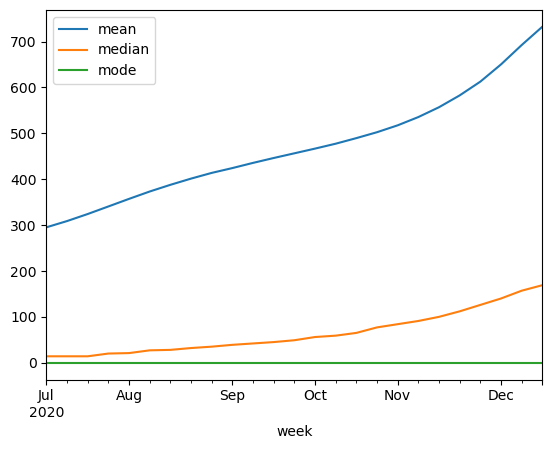

In [5]:
#This section plots the the graph of weekly statistics (deaths) from July to December 2020
death_stats.plot(x = "week")

#### Get mean, median, and mode of weakly mean, median, and mode for COVID-related deaths in USA

In [6]:
print("The mean of weekly means for COVID-related deaths in the USA from July 2020 to December 2020 is: ")
death_stats["mean"].mean()

The mean of weekly means for COVID-related deaths in the USA from July 2020 to December 2020 is: 


471.1959285937989

In [7]:
print("The median of weekly medians for COVID-related deaths in the USA from July 2020 to December 2020 is: ")
death_stats["median"].median()

The median of weekly medians for COVID-related deaths in the USA from July 2020 to December 2020 is: 


49.0

In [8]:
print("The mode of weekly modes for COVID-related deaths in the USA from July 2020 to December 2020 is: ")
death_stats["mode"].mode()

The mode of weekly modes for COVID-related deaths in the USA from July 2020 to December 2020 is: 


0    0.0
Name: mode, dtype: float64

#### Summary 
1 The mean of weekly means for COVID-related deaths in the USA from July 2020 to December 2020 is: 471.1959285937989

2 The median of weekly medians for COVID-related deaths in the USA from July 2020 to December 2020 is: 49.0

3 The mode of weekly modes for COVID-related deaths in the USA from July 2020 to December 2020 is: 0    0.0

These statistics provide insights into the distribution and central tendency of COVID-related deaths in the USA from July 2020 to December 2020. Here are some explanations/descriptions for each statistic:

- Mean of weekly means (471.20): This statistic suggests that, on average, there were about 471 COVID-related deaths per week during this period. This value provides an overall estimate of the typical weekly death toll across the six-month period.

- Median of weekly medians (49.0): The median is the middle value of a dataset when arranged in ascending order. Here, the median of weekly medians being 49 indicates that half of the weeks had a death toll equal to or below 49, and the other half had a death toll equal to or above 49. This suggests significant variability in weekly death counts, with a notable number of weeks having relatively low death tolls.

- Mode of weekly modes (0): The mode represents the most frequently occurring value in a dataset. A mode of 0 for weekly modes implies that the most common weekly death toll during this period was 0, indicating that there were many weeks with no reported COVID-related deaths. This is likely due to variations in reporting, testing, and interventions that influenced the number of deaths reported each week. Ultimately, this period was the beginning of COVID so detection and reporting mechanism would have been least as the disease was just springing up.

These statistics collectively paint a picture of the variability and distribution of COVID-related deaths in the USA during the specified period, highlighting both periods of elevated mortality and weeks with minimal reported deaths.

In [9]:
#This section calls the get_dates method and displays the infection cases from July to December 2020
infection_dates = get_dates(cases)

infection_dates

,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,618,644,651,661,670,684,706,728,746,756,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,911,997,1056,1131,1187,1224,1294,1359,1414,1518,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,356,360,366,371,381,398,403,413,428,441,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,197,199,201,211,218,224,228,231,236,242,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,113,122,124,126,128,136,138,150,156,157,...,2696,2702,2718,2762,2780,2820,2820,2820,2845,2854
3189,145,146,149,149,150,155,157,162,164,170,...,1990,1992,2002,2019,2033,2039,2039,2039,2080,2080
3190,190,190,192,198,200,201,202,205,208,208,...,1399,1406,1416,1446,1460,1475,1475,1475,1495,1497
3191,39,40,42,42,42,43,43,43,43,43,...,690,695,699,713,720,726,726,726,747,747


In [10]:
#This section calls the get_weekly_stats method and displays the weekly infection cases from July to December 2020
infection_stats = get_weekly_stats(infection_dates)
infection_stats

,week,mean,median,mode
0,2020-07-06,7004.789540,693.0,0.0
0,2020-07-13,8006.192296,850.0,0.0
0,2020-07-20,9012.041027,1037.0,0.0
0,2020-07-27,9956.800501,1224.0,0.0
0,2020-08-03,10796.655496,1417.0,0.0
0,2020-08-10,11548.264641,1605.0,0.0
0,2020-08-17,12208.251801,1794.0,0.0
0,2020-08-24,12825.450673,1957.0,0.0
0,2020-08-31,13435.312872,2149.0,0.0
0,2020-09-07,13976.595365,2328.0,0.0


<Axes: xlabel='week'>

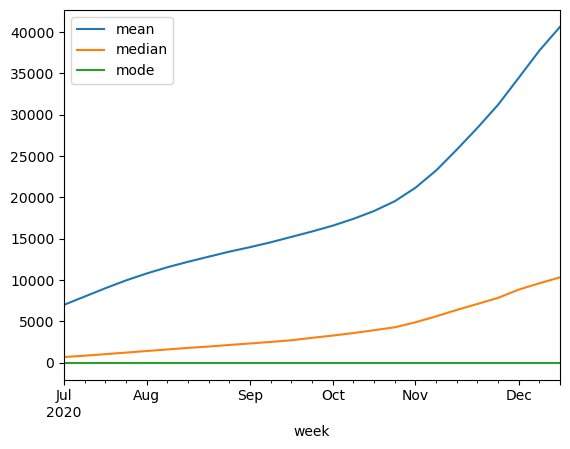

In [11]:
#This section plots the the graph of weekly statistics (infection) from July to December 2020
infection_stats.plot(x = "week")

In [12]:
print("The mean of weekly means for COVID infection cases in the USA from July 2020 to December 2020 is: ")
infection_stats["mean"].mean()

The mean of weekly means for COVID infection cases in the USA from July 2020 to December 2020 is: 


18755.426633260256

In [13]:
print("The median of weekly medians for COVID infection cases in the USA from July 2020 to December 2020 is: ")
infection_stats["median"].median()

The median of weekly medians for COVID infection cases in the USA from July 2020 to December 2020 is: 


3012.0

In [14]:
print("The mode of weekly modes for COVID infection cases in the USA from July 2020 to December 2020 is: ")
infection_stats["mode"].mode()

The mode of weekly modes for COVID infection cases in the USA from July 2020 to December 2020 is: 


0    0.0
Name: mode, dtype: float64

#### Summary
The mean of weekly means for COVID infection cases in the USA from July 2020 to December 2020 is:  18755.426633260256

The median of weekly medians for  COVID infection cases in the USA from July 2020 to December 2020 is:  3012.0

The mode of weekly modes for  COVID infection cases in the USA from July 2020 to December 2020 is:  0  

These statistics provide insights into the distribution and central tendency of COVID infection cases in the USA from July 2020 to December 2020. Here are some explanations/descriptions for each statistic:

- Mean of weekly means (18755.43): This statistic suggests that, on average, there were about 18,755 new COVID infection cases reported per week during this period. It provides an overall estimate of the typical weekly infection rate across the six-month period.

- Median of weekly medians (3012.0): The median is the middle value of a dataset when arranged in ascending order. Here, the median of weekly medians being 3012 indicates that half of the weeks had a reported infection case count equal to or below 3012, and the other half had a count equal to or above 3012. This suggests significant variability in weekly infection case counts, with some weeks having relatively low case counts and others having substantially higher counts.

- Mode of weekly modes (0): The mode represents the most frequently occurring value in a dataset. A mode of 0 for weekly modes implies that the most common weekly infection case count during this period was 0, indicating that there were many weeks with no reported new infections. This could be due to variations in testing, reporting delays, or possibly periods of low transmission.

These statistics collectively provide an overview of the distribution and trends in COVID infection cases in the USA during the specified period, highlighting both periods of elevated transmission and weeks with minimal reported cases.

# Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data

In [15]:
#Extract country from world data
country_data = pd.read_csv("owid-covid-data.csv")

country_data[country_data["location"] == "Russia"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
275927,RUS,Europe,Russia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275928,RUS,Europe,Russia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275929,RUS,Europe,Russia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275930,RUS,Europe,Russia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275931,RUS,Europe,Russia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277414,RUS,Europe,Russia,2024-01-31,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
277415,RUS,Europe,Russia,2024-02-01,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
277416,RUS,Europe,Russia,2024-02-02,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
277417,RUS,Europe,Russia,2024-02-03,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [16]:
countries = ["JPN", "BRA", "DEU", "CAN", "CHN", "RUS"] #ISO codes of selected countries: Japan, Brazil, Canada, China, and Russia 

In [17]:
def get_country_data(iso : str):
    data = country_data[country_data["iso_code"] == iso] #Restrict to country
    data["date"] = pd.to_datetime(data.loc[:,"date"])
    date_mask = [(data["date"] <= datetime.datetime(2020, 12, 27)), (data["date"] > datetime.datetime(2020, 7, 6))]
    date_mask_final = date_mask[0] & date_mask[1]

    data = data[date_mask_final]
    
    mean_cases = data["new_cases"].mean()
    median_cases = data["new_cases"].median()
    mode_cases = data["new_cases"].mode()
    
    mean_deaths = data["new_deaths"].mean()
    median_deaths = data["new_deaths"].median()
    mode_deaths = data["new_deaths"].mode()
    return mean_cases, median_cases, mode_cases, mean_deaths, median_deaths, mode_deaths

get_country_data("JPN")

C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])


(1136.7241379310344,
 0.0,
 0    0.0
 Name: new_cases, dtype: float64,
 12.850574712643677,
 0.0,
 0    0.0
 Name: new_deaths, dtype: float64)

In [18]:
for i in countries:
    print("%s data"%i)
    print('''
    mean_cases = %s
    median_cases = %s
    mode_cases = %s
    
    mean_deaths = %s
    median_deaths = %s
    mode_deaths = %s
    __________________________________________
    '''%get_country_data(i))

C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])


JPN data

    mean_cases = 1136.7241379310344
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 12.850574712643677
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
BRA data

    mean_cases = 33962.52298850575
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 731.6896551724138
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
DEU data

    mean_cases = 8410.022988505747
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 216.70114942528735
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
CAN data


C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,


    mean_cases = 2495.183908045977
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 35.09770114942529
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
CHN data

    mean_cases = 63.32183908045977
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 0.7413793103448276
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
RUS data

    mean_cases = 13614.925287356322
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 256.41954022988506
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    


C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])


## Summary
These statistics provide insights into the distribution and central tendency of COVID-19 cases and deaths in several countries: Japan (JPN), Brazil (BRA), Germany (DEU), Canada (CAN), China (CHN), and Russia (RUS). Here are some explanations and descriptions for each statistic:

##### COVID-19 Cases:
###### Mean Cases:

        Japan: The mean number of new cases per day is 1136.72.
        Brazil: The mean number of new cases per day is 33962.52
        Germany: The mean number of new cases per day is 8410.02
        Canada: The mean number of new cases per day is 2495.18.
        China: The mean number of new cases per day is 63.32.
        Russia: The mean number of new cases per day is 13614.93.
- Explanation: The mean represents the average number of new cases reported daily during the specified period. This indicates the typical magnitude of the outbreak in each country.

###### Median Cases:
      For all countries, the median number of new cases per day is 0.0.

- Explanation: The median is the middle value of the dataset when arranged in ascending order. A median of 0.0 indicates that half of the days had no reported new cases, highlighting variability and possibly periods of low transmission.

###### Mode Cases:
     For all countries, the mode of new cases per day is 0.0.

- Explanation: The mode is the value that appears most frequently in the dataset. A mode of 0.0 indicates that 0 was the most common number of new cases reported per day across the specified period.

##### COVID-19 Deaths:
###### Mean Deaths:
      
      Japan: The mean number of new deaths per day is 12.85.
      Brazil: The mean number of new deaths per day is 731.69.
      Germany: The mean number of new deaths per day is 216.70.
      Canada: The mean number of new deaths per day is 35.10.
      China: The mean number of new deaths per day is 0.74.
      Russia: The mean number of new deaths per day is 256.42.

- Explanation: Similar to mean cases, the mean deaths represent the average number of new deaths reported daily during the specified period, indicating the typical mortality rate in each country.
###### Median Deaths:
      For all countries, the median number of new deaths per day is 0.0.

- Explanation: As with median cases, a median of 0.0 for deaths indicates variability and possibly periods of no reported deaths.

###### Mode Deaths:
     For all countries, the mode of new deaths per day is 0.0.

- Explanation: Again, a mode of 0.0 indicates that 0 was the most common number of new deaths reported per day across the specified period in each country.

- These statistics collectively provide an overview of the distribution and trends in COVID-19 cases and deaths in the specified countries, highlighting both periods of heightened transmission or mortality and periods of relative calm.


# Plot weekly trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases, and log normalized values. (hint: do normalization: number of cases per 100,000, and then use np.log10())

In [19]:
us_data = combined

us_population = sum(us_data["population"])

us_population

328239523

<Axes: >

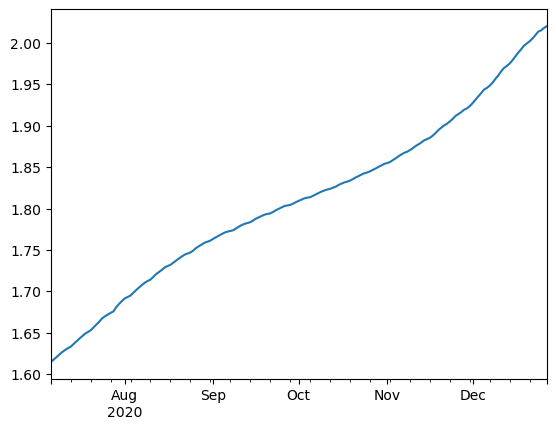

In [20]:
norm_death_dates = (death_dates/(us_population/100000)).sum()
norm_death_dates += 1 # To prevent values of -infinity
norm_death_dates = norm_death_dates.agg(np.log10)

norm_death_dates.plot()

In [21]:
norm_death_dates

2020-07-06    1.614379
2020-07-07    1.617595
2020-07-08    1.620468
2020-07-09    1.623636
2020-07-10    1.626556
                ...   
2020-12-23    2.009242
2020-12-24    2.013509
2020-12-25    2.015005
2020-12-26    2.017874
2020-12-27    2.020004
Length: 175, dtype: float64

<Axes: >

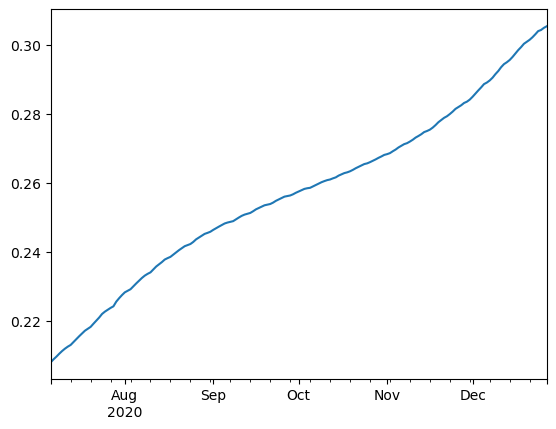

In [22]:
norm_infection_dates = (infection_dates/(us_population/100000))
norm_infection_dates += 1 # To prevent values of -infinity
norm_infection_dates = norm_death_dates.agg(np.log10)

norm_infection_dates.plot()

## Get data from other countries

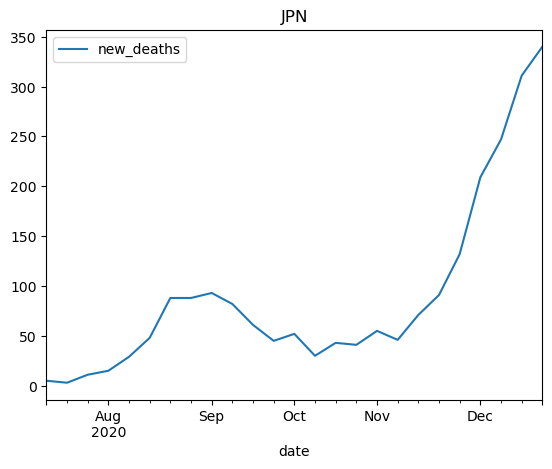

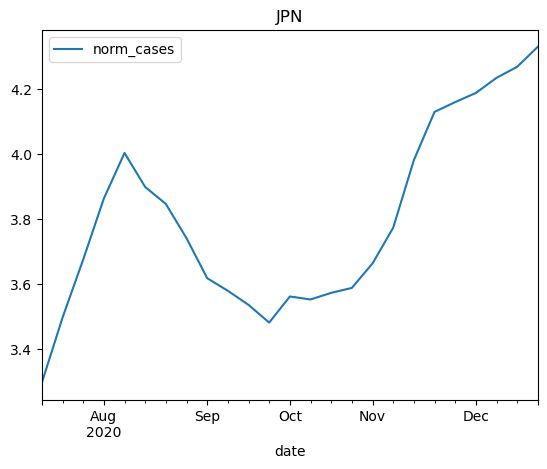

In [23]:
def plot_country(iso : str):
    data = country_data[country_data["iso_code"] == iso].copy() #Restrict to country
    data["date"] = pd.to_datetime(data.loc[:,"date"])
    date_mask = [(data["date"] <= datetime.datetime(2020, 12, 27)), (data["date"] > datetime.datetime(2020, 7, 6))]
    date_mask_final = date_mask[0] & date_mask[1]
    
    data = data[date_mask_final]
    #Remove zeros
    
    '''norm_death_dates = (death_dates/(us_population/100000)).sum()
    norm_death_dates += 1 # To prevent values of -infinity
    norm_death_dates = norm_death_dates.agg(np.log10)'''
    
     
    
    
    data = data[data["new_cases"] != 0]
    
    data["new_cases"] += 1
    data["norm_cases"] = data["new_cases"].apply(np.log10)
    
    data.plot(x = "date", y = "new_deaths", title = iso)
    data.plot(x = "date", y = "norm_cases", title = iso)


plot_country("JPN")

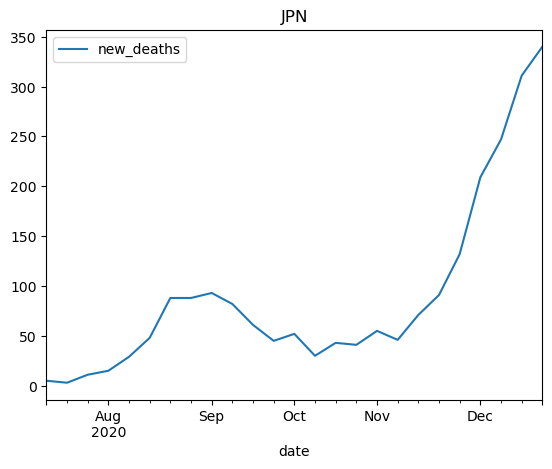

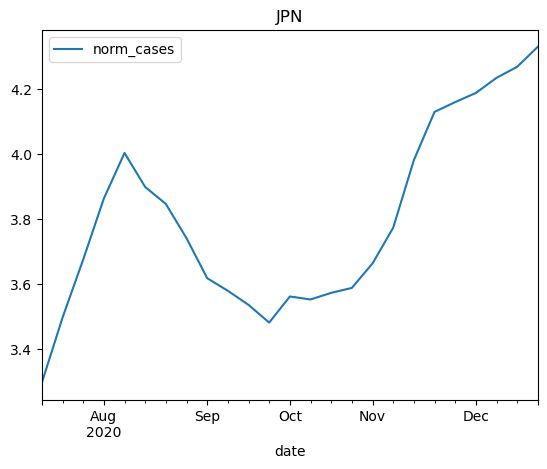

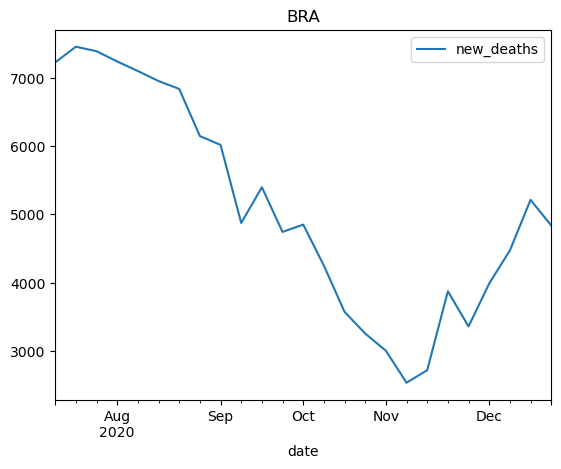

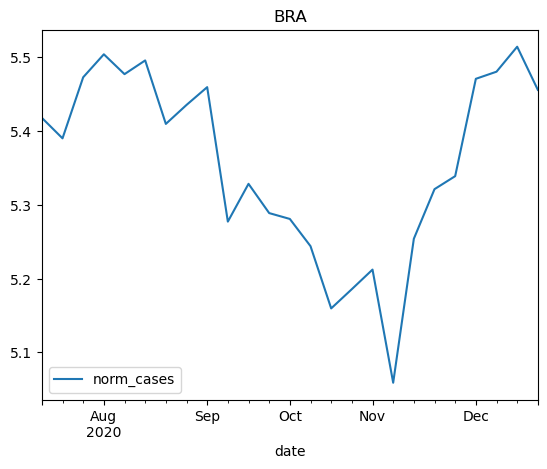

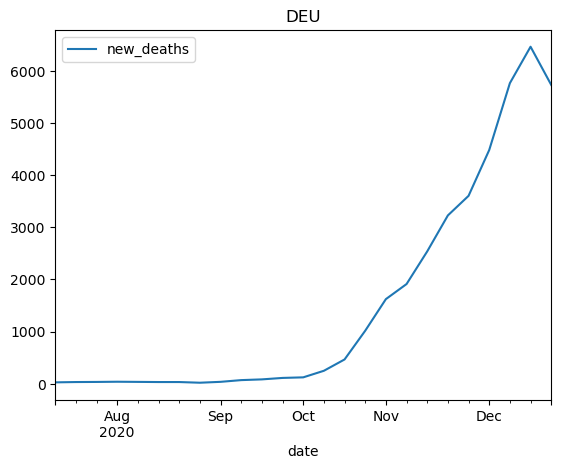

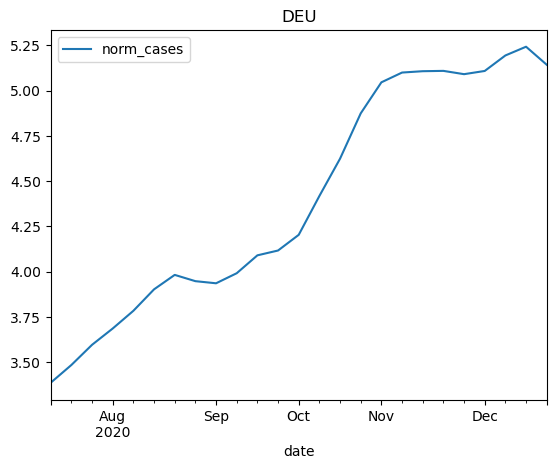

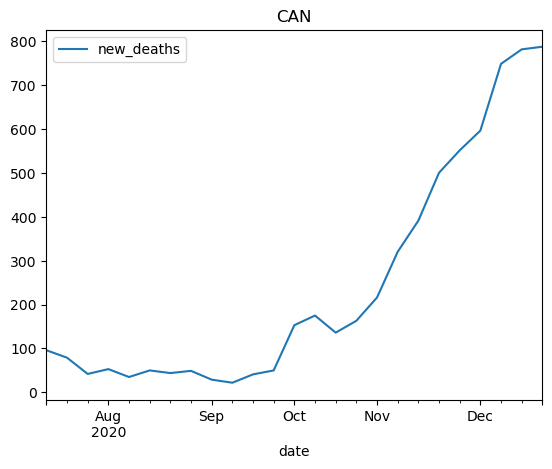

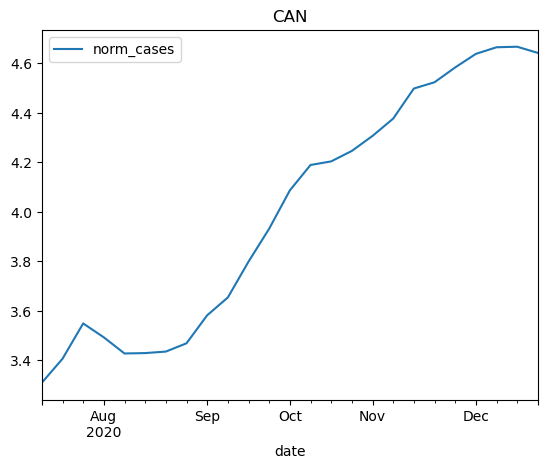

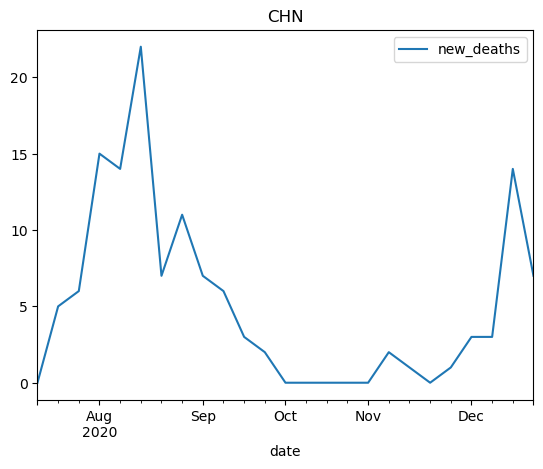

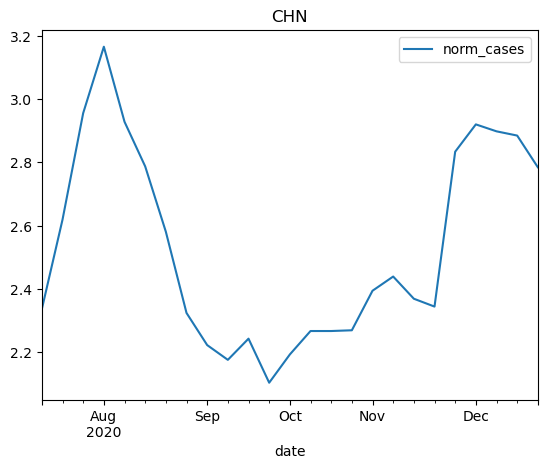

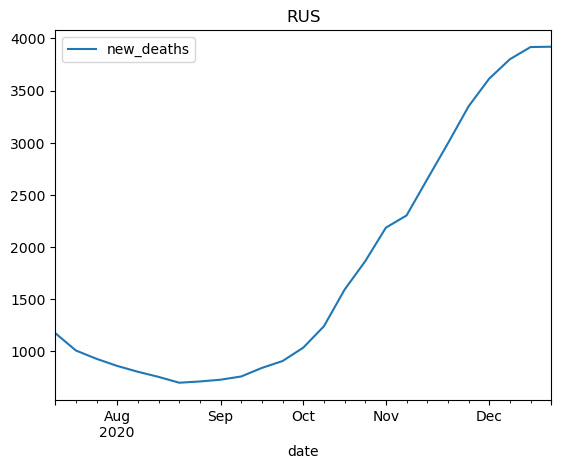

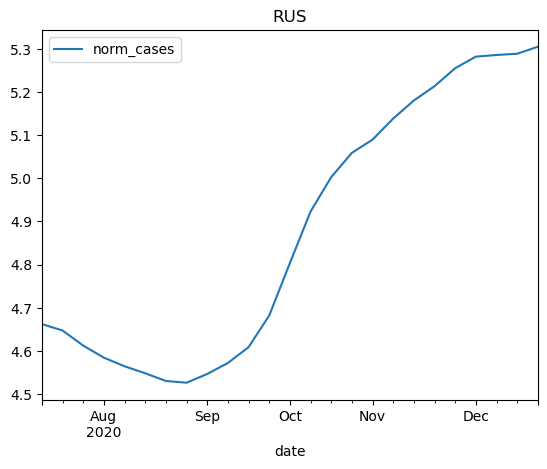

In [24]:
for i in countries:
    plot_country(i)

## Identify the peak weeks of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, weather, etc). Explain with a description in the notebooks.

In [25]:
def get_wk_stats(dates): #Note: was written for deaths, but should work the same for infect

    weeks = [range(i, i + 7) for i in range(0, len(dates.columns), 7)]
    dates.iloc[:, weeks[0]]
    
    stats = pd.DataFrame({"week": [],"sum" : []})
    
    for i in range(len(weeks)):
        date = dates.iloc[:, weeks[i]].iloc[0, :].keys()[0]
        #print(date)
        week = dates.iloc[:, weeks[i]].sum(axis = 1)
        
        new_row = pd.DataFrame({"week": [date], "sum": [week.sum()]})

        stats = pd.concat([stats, new_row])
    return stats


In [26]:
death_dates = get_dates(deaths)
death_stats = get_wk_stats(death_dates)

death_stats



,week,sum
0,2020-07-06,942241.0
0,2020-07-13,985787.0
0,2020-07-20,1034847.0
0,2020-07-27,1087427.0
0,2020-08-03,1140240.0
0,2020-08-10,1191506.0
0,2020-08-17,1237994.0
0,2020-08-24,1281259.0
0,2020-08-31,1321017.0
0,2020-09-07,1354608.0


In [27]:
print("The maximum number of weekly deaths in the USA")
death_stats['sum'].max()

The maximum number of weekly deaths in the USA


2338334.0

##### Peak USA covid-related Deaths Explained
Based on the weekly deaths data above, the peak weeks of deaths in the US can be identified by looking at the week with the highest number of reported deaths. From the data , the peak week of deaths in the US is:

    Peak Week: 2020-12-21 with a sum of 2,338,334 deaths.

Now, let's explore potential reasons for this peak:

- Holiday Season: The peak week of deaths in late December (2020-12-21) coincides with the holiday season, including Christmas and New Year's Eve. During this time, there is often increased social gatherings and travel, which can lead to higher rates of virus transmission and subsequently, an increase in deaths.

- Winter Weather: In late December, many parts of the US experience colder weather, leading to more indoor gatherings where virus transmission is more likely compared to outdoor settings. This increased indoor interaction could contribute to higher rates of COVID-19 transmission and ultimately, more deaths.

- Thanksgiving Effects: The peak in deaths in late November may be influenced by Thanksgiving gatherings. Travel and family gatherings during the Thanksgiving holiday could have contributed to increased virus transmission, leading to a subsequent rise in deaths a few weeks later. This effect might have continued into December, contributing to the peak observed in late December.

- Delayed Reporting: It's important to consider the possibility of delayed reporting or data processing, which could impact the timing of peaks in reported deaths. Delays in reporting could lead to an accumulation of deaths reported in a particular week, potentially resulting in a peak.

- These factors, among others, could have contributed to the peak week of deaths observed in the US in late December. Further analysis and research would be needed to fully understand the dynamics behind this peak and its implications for public health measures.


In [28]:
infection_stats = get_wk_stats(infection_dates)
infection_stats

,week,sum
0,2020-07-06,22366293.0
0,2020-07-13,25563772.0
0,2020-07-20,28775447.0
0,2020-07-27,31792064.0
0,2020-08-03,34473721.0
0,2020-08-10,36873609.0
0,2020-08-17,38980948.0
0,2020-08-24,40951664.0
0,2020-08-31,42898954.0
0,2020-09-07,44627269.0


In [29]:
print("The maximum number of weekly infection cases in the USA")
infection_stats['sum'].max()


The maximum number of weekly infection cases in the USA


129737094.0

##### Peak USA covid Cases Explained
Based on the provided data, the peak weeks of new cases in the US can be identified by looking at the week with the highest number of reported new cases. From the data provided, the peak week of new cases in the US is:

    Peak Week: 2020-12-21 with a sum of 129,737,094 new cases.

Now, let's explore potential reasons for this peak:
- Holiday Season: The peak week of new cases in late December (2020-12-21) coincides with the holiday season, including Christmas and New Year's Eve. During this time, there may be increased social gatherings and travel, which can lead to higher rates of virus transmission and subsequently, an increase in new cases.
- Winter Weather: In late December, many parts of the US experience colder weather, leading to more indoor gatherings where virus transmission is more likely compared to outdoor settings. This increased indoor interaction could contribute to higher rates of COVID-19 transmission and ultimately, more new cases.
- Thanksgiving Effects: The peak in new cases in late November may be influenced by Thanksgiving gatherings. Travel and family gatherings during the Thanksgiving holiday could have contributed to increased virus transmission, leading to a subsequent rise in new cases a few weeks later. This effect might have continued into December, contributing to the peak observed in late December.
- Delayed Reporting: It's important to consider the possibility of delayed reporting or data processing, which could impact the timing of peaks in reported new cases. Delays in reporting could lead to an accumulation of cases reported in a particular week, potentially resulting in a peak.

- These factors, among others, could have contributed to the peak week of new cases observed in the US in late December. Further analysis and research would be needed to fully understand the dynamics behind this peak and its implications for public health measures.

In [30]:
# Define a function to analyze COVID-19 data for a specific country.
# Parameters:
#   - iso: ISO code of the country
#   - country_data: DataFrame containing COVID-19 data for multiple countries
# Actions:
#   1. Filter data for the specified country and date range (from July 6, 2020, to December 21, 2020).
#   2. Group data by week and calculate the sum of cases and deaths per week.
#   3. Print the weekly data including the date, new cases, and new deaths.
#   4. Identify and print the peak week and number of cases for cases and deaths.
# Returns: None
def analyze_country_covid_data(iso: str, country_data):
    data = country_data[country_data["iso_code"] == iso].copy()  # Restrict to country
    data["date"] = pd.to_datetime(data["date"])
    
    # Filter data for the specified date range
    data = data[(data["date"] >= datetime.datetime(2020, 7, 6)) & (data["date"] <= datetime.datetime(2020, 12, 21))]
    
    # Group data by week and calculate sum of cases and deaths per week
    data_weekly = data.resample('W-Mon', on='date').sum().reset_index()
    
    # Print week and sum of cases and deaths per week
    print(data_weekly[['date', 'new_cases', 'new_deaths']])
    
    # Identify peak week for cases
    peak_week_cases = data_weekly.loc[data_weekly['new_cases'].idxmax(), 'date']
    peak_cases = data_weekly['new_cases'].max()
    print(f"Peak Week for Cases: {peak_week_cases.strftime('%Y-%m-%d')}, Peak Cases: {peak_cases}")
    
    # Identify peak week for deaths
    peak_week_deaths = data_weekly.loc[data_weekly['new_deaths'].idxmax(), 'date']
    peak_deaths = data_weekly['new_deaths'].max()
    print(f"Peak Week for Deaths: {peak_week_deaths.strftime('%Y-%m-%d')}, Peak Deaths: {peak_deaths}")
    print()

In [32]:
# Assuming you have a DataFrame named country_data containing the data for all countries
countries = ["JPN", "BRA", "DEU", "CAN", "CHN", "RUS"]
for country in countries:
    print(f"Country: {country}")
    analyze_country_covid_data(country, country_data)


Country: JPN
         date  new_cases  new_deaths
0  2020-07-06        0.0         0.0
1  2020-07-13     1980.0         5.0
2  2020-07-20     3140.0         3.0
3  2020-07-27     4740.0        11.0
4  2020-08-03     7307.0        15.0
5  2020-08-10    10094.0        29.0
6  2020-08-17     7931.0        48.0
7  2020-08-24     7033.0        88.0
8  2020-08-31     5517.0        88.0
9  2020-09-07     4155.0        93.0
10 2020-09-14     3799.0        82.0
11 2020-09-21     3439.0        61.0
12 2020-09-28     3033.0        45.0
13 2020-10-05     3649.0        52.0
14 2020-10-12     3573.0        30.0
15 2020-10-19     3744.0        43.0
16 2020-10-26     3878.0        41.0
17 2020-11-02     4612.0        55.0
18 2020-11-09     5940.0        46.0
19 2020-11-16     9591.0        71.0
20 2020-11-23    13502.0        91.0
21 2020-11-30    14474.0       132.0
22 2020-12-07    15445.0       209.0
23 2020-12-14    17189.0       247.0
24 2020-12-21    18593.0       311.0
Peak Week for Cases: 2020

C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1985928250.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_weekly = data.resample('W-Mon', on='date').sum().reset_index()
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1985928250.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_weekly = data.resample('W-Mon', on='date').sum().reset_index()
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1985928250.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

         date  new_cases  new_deaths
0  2020-07-06        0.0         0.0
1  2020-07-13     2035.0        96.0
2  2020-07-20     2544.0        79.0
3  2020-07-27     3535.0        42.0
4  2020-08-03     3105.0        53.0
5  2020-08-10     2672.0        35.0
6  2020-08-17     2682.0        50.0
7  2020-08-24     2720.0        44.0
8  2020-08-31     2938.0        49.0
9  2020-09-07     3814.0        29.0
10 2020-09-14     4502.0        22.0
11 2020-09-21     6285.0        41.0
12 2020-09-28     8545.0        50.0
13 2020-10-05    12203.0       153.0
14 2020-10-12    15458.0       175.0
15 2020-10-19    15989.0       136.0
16 2020-10-26    17626.0       163.0
17 2020-11-02    20267.0       216.0
18 2020-11-09    23810.0       320.0
19 2020-11-16    31509.0       391.0
20 2020-11-23    33401.0       500.0
21 2020-11-30    38345.0       551.0
22 2020-12-07    43504.0       596.0
23 2020-12-14    46271.0       748.0
24 2020-12-21    46504.0       781.0
Peak Week for Cases: 2020-12-21, Peak 

C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1985928250.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_weekly = data.resample('W-Mon', on='date').sum().reset_index()
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1985928250.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_weekly = data.resample('W-Mon', on='date').sum().reset_index()
C:\Users\iwaye\AppData\Local\Temp\ipykernel_34528\1985928250.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

##### Other Countries' Peak weeks
Country: JPN

- Peak Week for Cases: 2020-12-21, Peak Cases: 18593.0
- Peak Week for Deaths: 2020-12-21, Peak Deaths: 311.0
    
Country: BRA

- Peak Week for Cases: 2020-12-21, Peak Cases: 326751.0
- Peak Week for Deaths: 2020-07-20, Peak Deaths: 7453.0
        
Country: DEU

- Peak Week for Cases: 2020-12-21, Peak Cases: 174589.0
- Peak Week for Deaths: 2020-12-21, Peak Deaths: 6460.0

Country: CAN

- Peak Week for Cases: 2020-12-21, Peak Cases: 46504.0
- Peak Week for Deaths: 2020-12-21, Peak Deaths: 781.0
        
Country: CHN

- Peak Week for Cases: 2020-08-03, Peak Cases: 1463.0
- Peak Week for Deaths: 2020-08-17, Peak Deaths: 22.0
        
Country: RUS

- Peak Week for Cases: 2020-12-21, Peak Cases: 194449.0
- Peak Week for Deaths: 2020-12-21, Peak Deaths: 3917.0

#### Other Countries' Peak weeks (deaths and cases) Explained
       
To understand the potential reasons behind the peak weeks of COVID-19 cases and deaths in different countries, let's examine some possible factors:

- Holiday Gatherings and Travel:
        December is a month with several holidays and festivities globally, including Christmas and New Year's Eve. People often travel to visit family and friends during this time, leading to increased social interactions and potential virus transmission.
        The peak weeks of cases and deaths in several countries, including Japan, Brazil, Germany, Canada, and Russia, occurring around December 21, coincide with the holiday season. This suggests that holiday gatherings and travel may have contributed to the surge in COVID-19 cases and fatalities.

- Winter Season and Indoor Activities:
        In many countries, December falls during the winter season when people spend more time indoors due to colder weather. Indoor gatherings have a higher risk of COVID-19 transmission compared to outdoor settings.
        The combination of holiday gatherings and indoor activities during winter could have facilitated the spread of the virus, leading to peak cases and deaths in December for these countries.

- Relaxation of Restrictions:
        Some countries may have relaxed restrictions or implemented less stringent measures during the holiday season to accommodate celebrations and boost economic activity. This relaxation could have contributed to increased virus transmission.
        Brazil experienced its peak week for deaths on July 20, which may be attributed to factors such as delayed response, inadequate healthcare infrastructure, and policy decisions affecting the spread of the virus.

- Variants and Public Behavior:
        The emergence of new variants of the virus, which may be more transmissible, could also contribute to peaks in cases and deaths. Public behavior, such as reduced adherence to preventive measures during holidays, could exacerbate the impact of these variants.
        While China's peak week for cases occurred in August 2020, it's possible that stringent containment measures and public health interventions helped mitigate the spread of the virus during subsequent peaks.

- Vaccination Status:
        The availability and distribution of vaccines can also influence the trajectory of COVID-19 cases and deaths. Countries with higher vaccination rates may experience milder peaks or delayed peaks compared to those with lower vaccination coverage.
        However, in December 2020, vaccination efforts were still in their early stages in most countries, so the impact of vaccination on peak weeks may have been limited.

In summary, the peak weeks of COVID-19 cases and deaths in various countries coincide with factors such as holiday gatherings, winter season, relaxation of restrictions, emergence of variants, and vaccination status. Understanding these factors can inform public health strategies to mitigate the spread of the virus during future peaks and similar situations.